In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from zero_helpers.imports import * 

In [3]:
from zero_liftsim.simmanager import SimulationManager
from zero_liftsim.helpers import load_asset_template

# Run Simulation

In [4]:
# setup and run simulation
manager = SimulationManager(
    n_agents=10,
    lift_capacity=2,
)
result = manager.run()
print(result)

{'total_rides': 125, 'average_wait': 21.208, 'agents': [Agent(1) absorbed-ability 32000bf7-f582-4241-b378-ef43f82572b3, Agent(2) rapid-muscle c6ff93b0-4bbc-4a46-91bd-30b1133cd853, Agent(3) towering-school 7cf47112-4aac-4db5-9c84-9f20f68d7601, Agent(4) awful-brain 5614bac5-7e91-4a38-af62-42a23b9b01cb, Agent(5) utopian-radio 688b8220-92e2-40a5-b109-323c3662ed62, Agent(6) alcoholic-sign f4476c20-6815-435a-bb61-15f9b9059c11, Agent(7) alleged-possible 4e11449b-a8f7-47f4-bc47-277241630b2d, Agent(8) nosy-button d13906ed-caca-4ab9-8253-8eb8fc021bda, Agent(9) unbiased-claim b614b8c2-a23f-4e6f-8b37-e72701f7aebe, Agent(10) past-option 11d3196e-74a1-4b3e-9e01-31b5ae70f579]}


## Retrieve Data from Simulation

In [5]:
# get rideloop explogs and agent event log
d = manager.retrieve_data()
e = d['exp_rideloop']
l = d['agent_log']

# Visualization

In [6]:
from zero_liftsim import visualize as viz

KeyError: 'event'

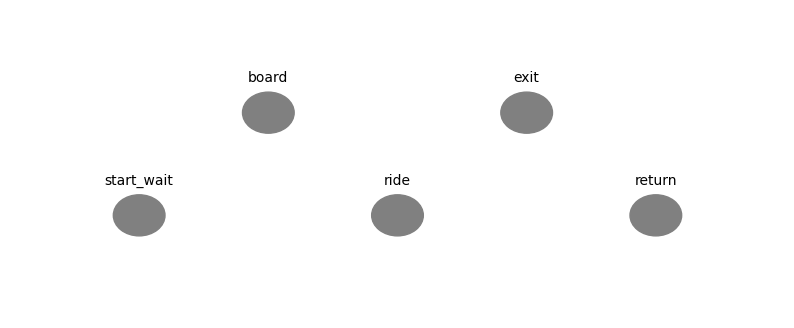

In [7]:
x = viz.visualize_states(e, pd.to_datetime('2025-03-12 11:57:00'))

# Sample a Ride Event (from agent log)

In [ ]:
m = l['event'] == 'ride_complete'
event_ride_comp =l[m].sample().iloc[0].to_dict()
event_ride_comp

## retrieve agent from ride event

In [ ]:
a = manager.lookup_agent(event_ride_comp['agent_uuid'])
l = l[l['agent_uuid'] == a.agent_uuid]
a

## retrieve exp log related to event (from exp_rideloop object on agent_exp_log_data)

In [ ]:
idx = (e['time'] - event_complete_ride['time']).dt.total_seconds().abs().idxmin()
exp = e.loc[idx].to_dict()
exp

In [ ]:
a = manager.lookup_agent(event_ride_comp['agent_uuid'])
l = l[l['agent_uuid'] == a.agent_uuid]
a

In [ ]:
t = load_asset_template('agent-ride-exp.md.j2')
print(t.render(exp))